<a href="https://colab.research.google.com/github/Naditya206/Machine-Learning/blob/main/TG4_244107023008_NADITYA_PRASTIA_ANDINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


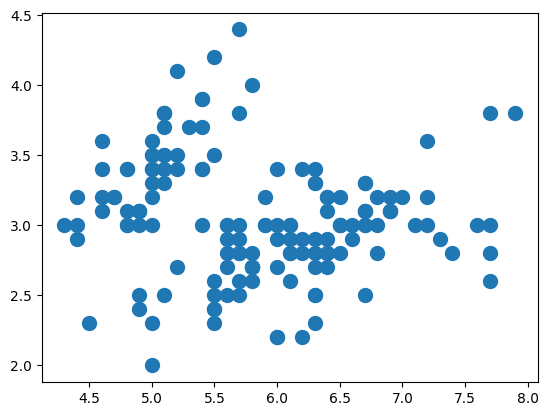

In [8]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [9]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

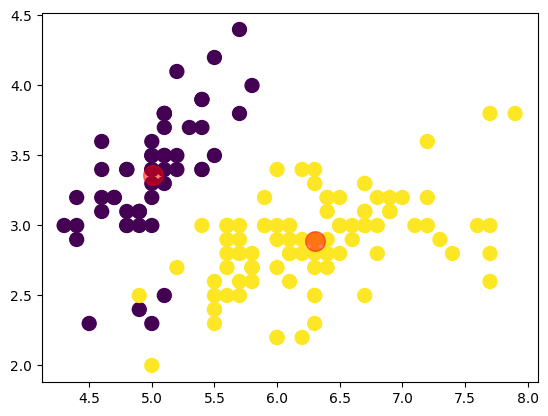

In [10]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [11]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


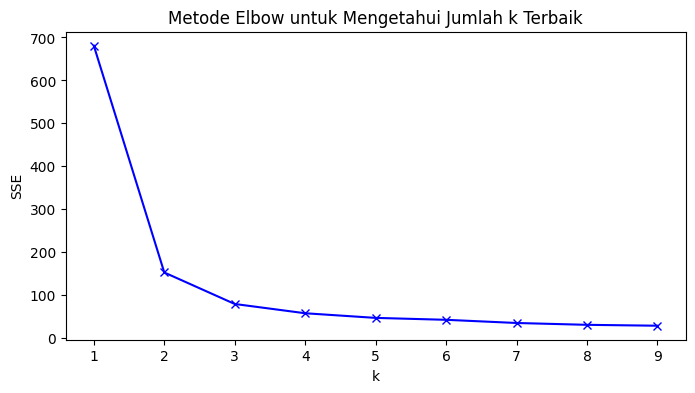

In [13]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()


In [14]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=57.34492380952378
k=5; SSE=46.535582051282034
k=6; SSE=42.06528333333333
k=7; SSE=34.65550213675215
k=8; SSE=30.37497544122546
k=9; SSE=28.290917748917764


# Praktikum 2

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Pengantar k-Means

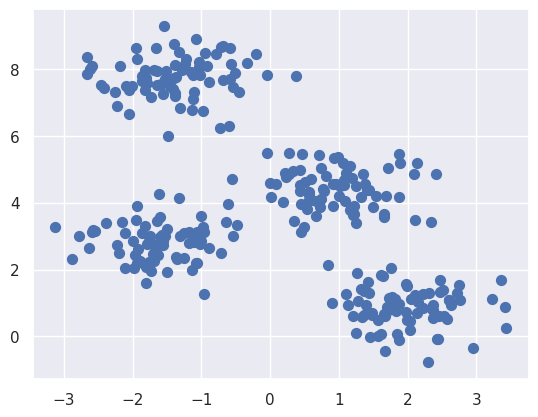

In [16]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

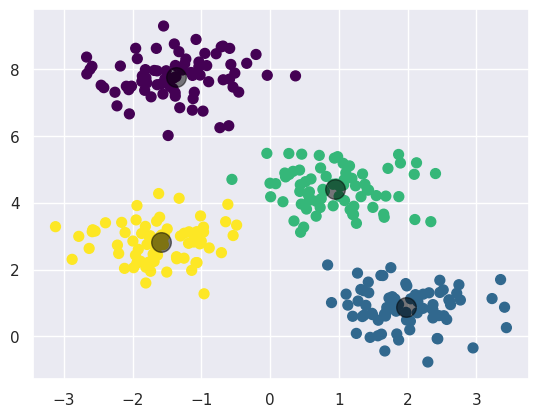

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Algoritma Expectation-Maximization

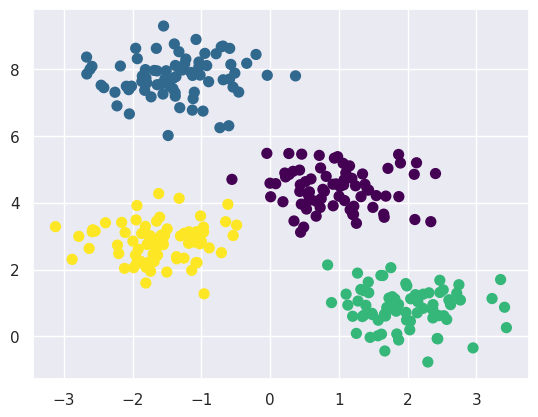

In [19]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

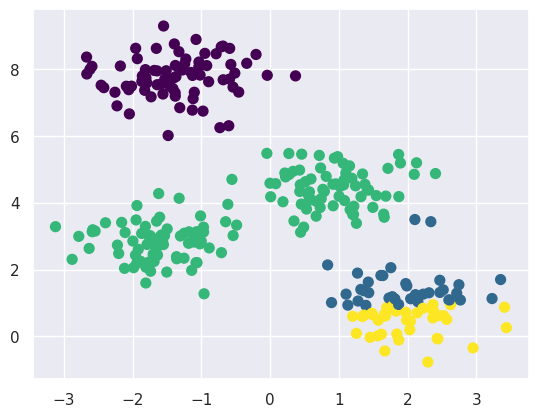

In [20]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

## Optimalisasi Jumlah Klaster

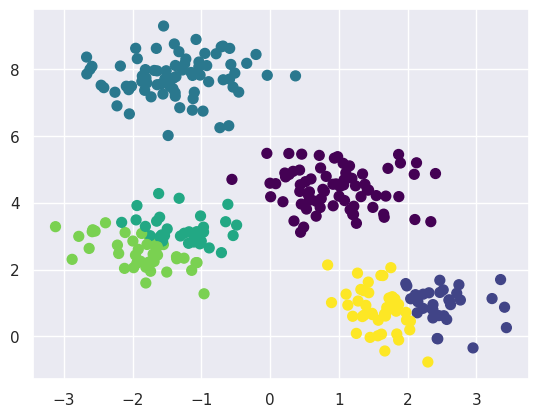

In [21]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Batas Klaster yang Tidak Selalu Linier

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

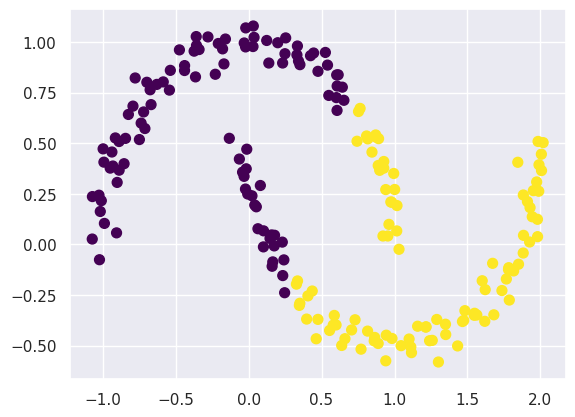

In [23]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


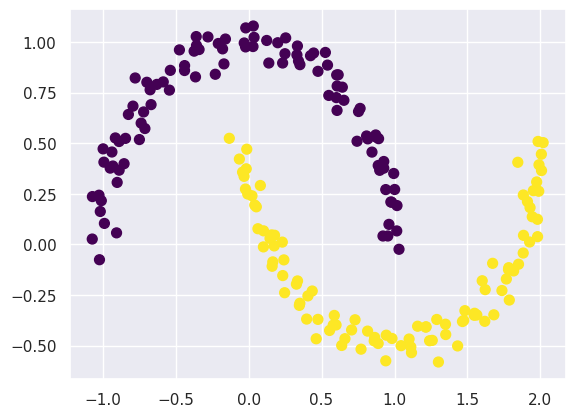

In [24]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Contoh Kasus 1: Karakter Angka

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [26]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

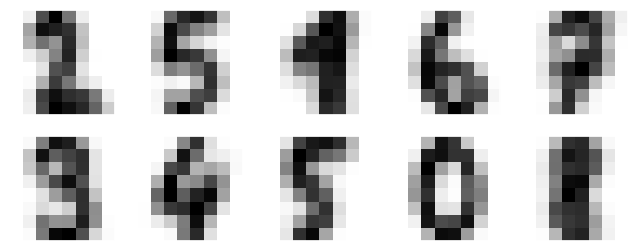

In [27]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [28]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

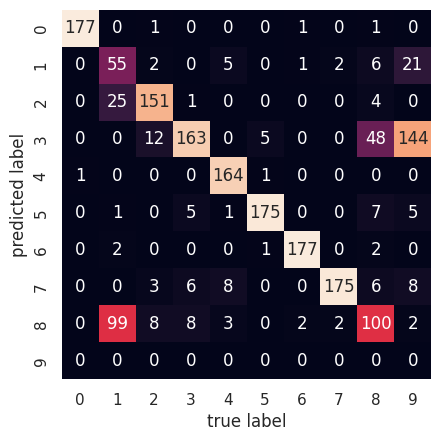

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [31]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

## Studi Kasus 2: Kompresi Citra

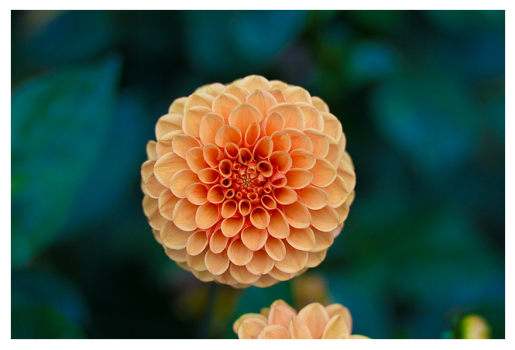

In [32]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [33]:
flower.shape

(427, 640, 3)

In [34]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [35]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

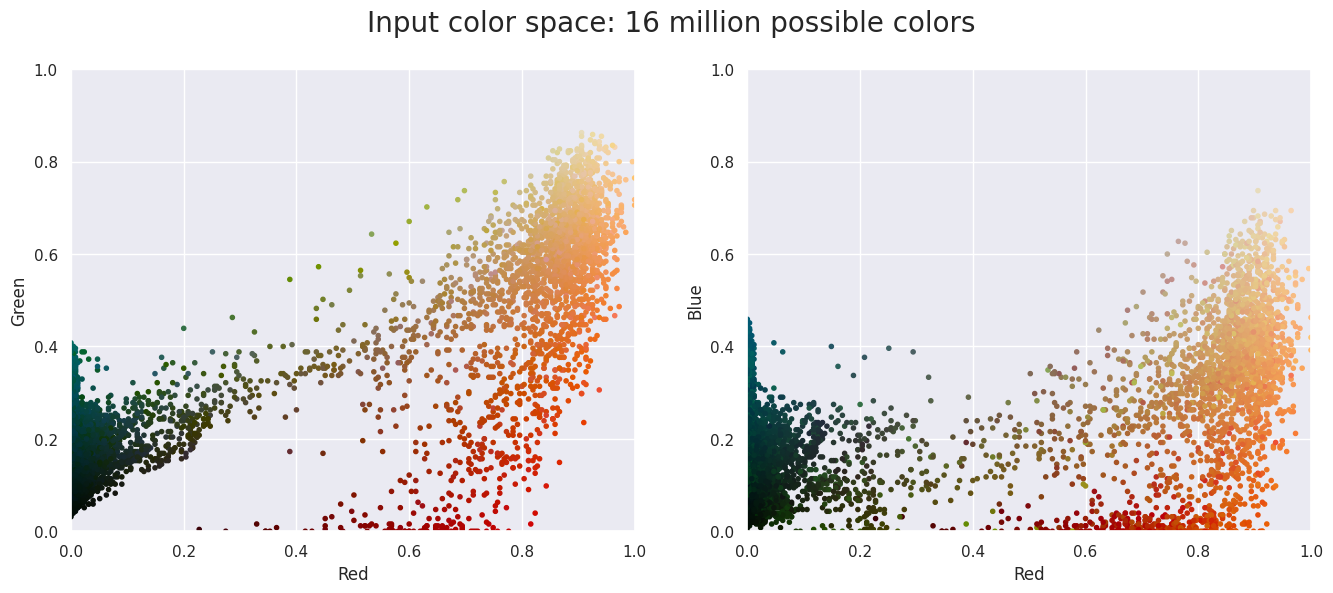

In [36]:
plot_pixels(data, title='Input color space: 16 million possible colors')

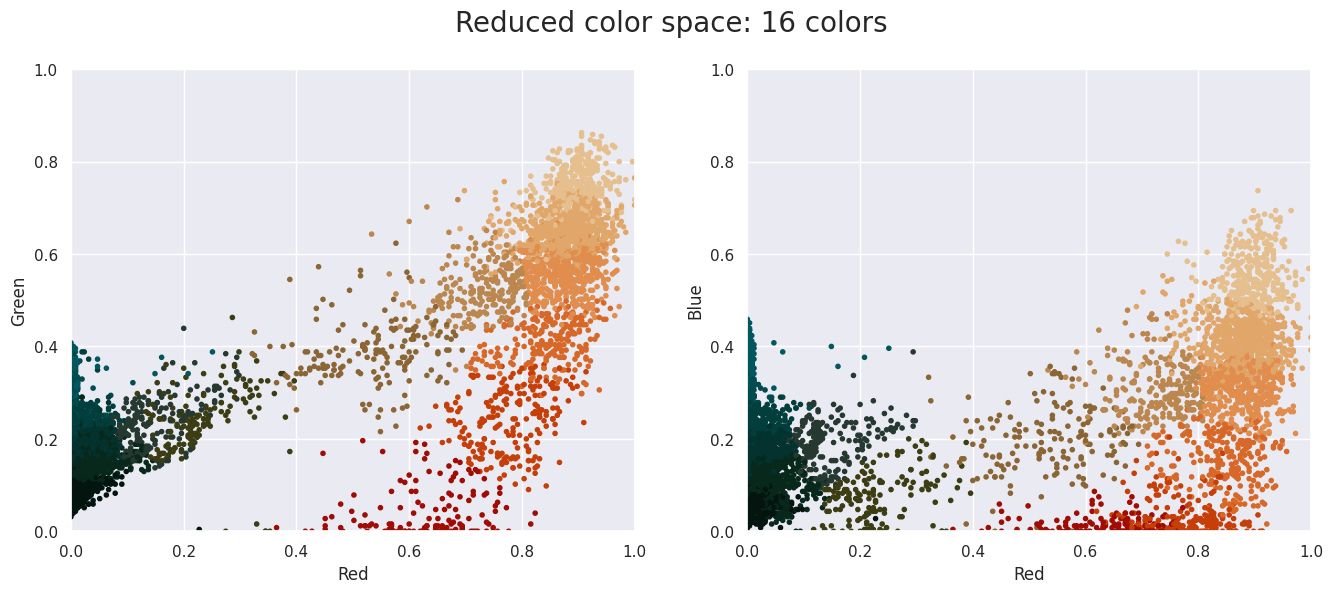

In [37]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

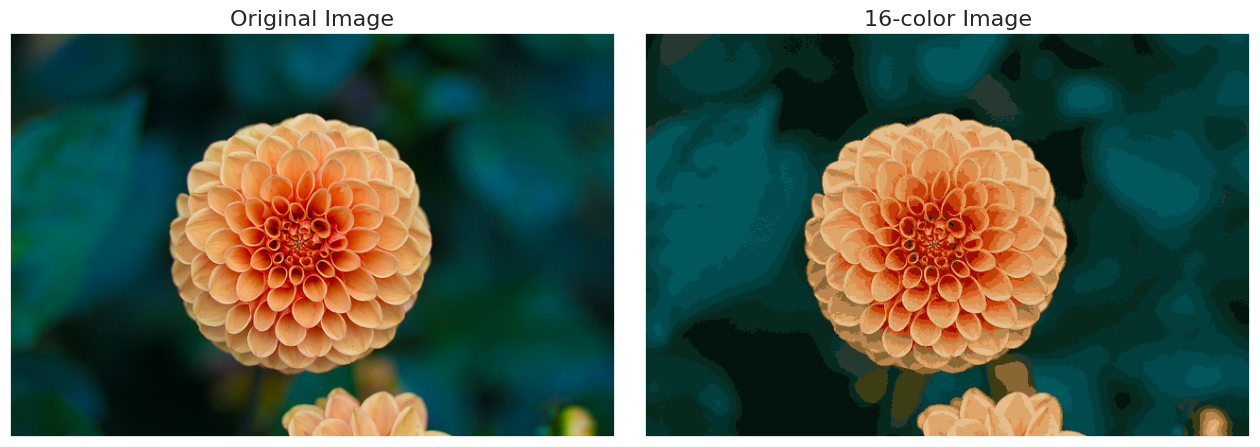

In [38]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# Praktikum 3

## Pembuatan Dataset Sintetis

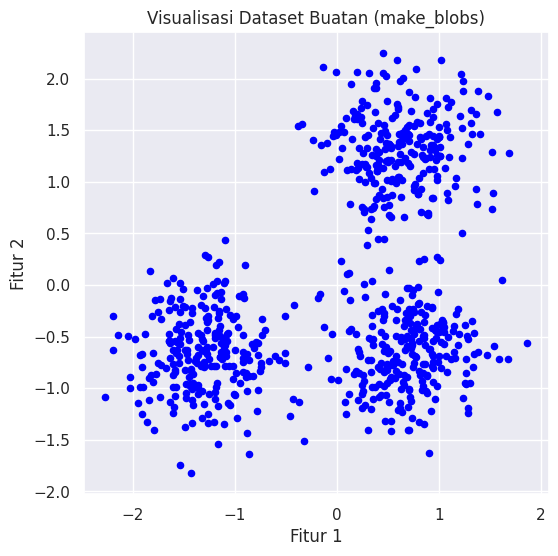

In [45]:
# 1. Import library
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 2. Buat dataset buatan (3 cluster)
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750,
    centers=centers,
    cluster_std=0.4,
    random_state=0
)

# 3. Standarisasi data
X = StandardScaler().fit_transform(X)

# 4. Visualisasi dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], s=20, c='blue')
plt.title("Visualisasi Dataset Buatan (make_blobs)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()


## Compute DBSCAN

In [47]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Terapkan DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Hitung jumlah cluster (tidak termasuk noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 18


## Evaluasi Kualitas Klasterisasi

In [49]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


## Visualisasi Hasil Klasterisasi

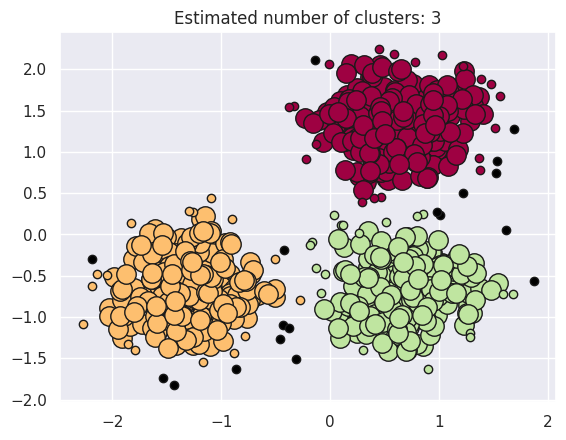

In [51]:
unique_labels = set(labels)
# Use a boolean array to mark the core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Tugas Praktikum

## 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,

    1. Gunakan data 'Mall_Customers.csv'

    2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

    3. Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

Data Awal:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


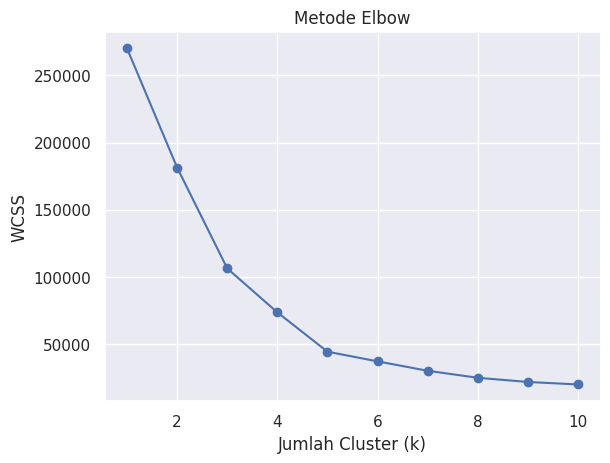

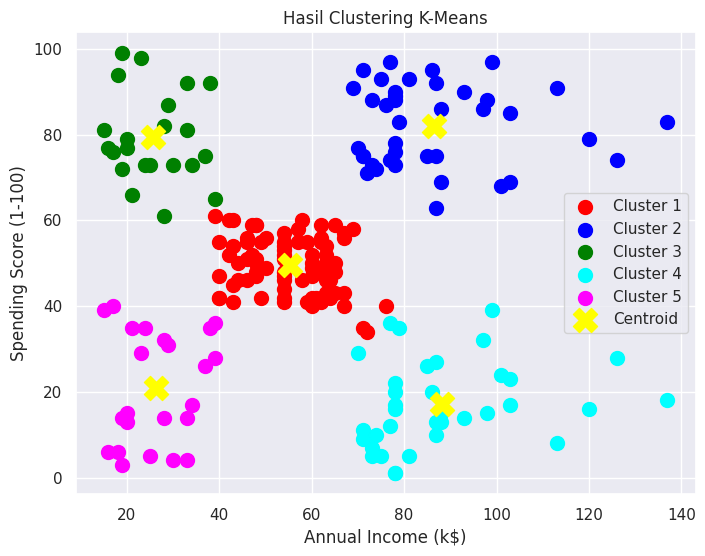

In [52]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load dataset
df = pd.read_csv("Mall_Customers.csv")
print("Data Awal:")
print(df.head())

# 2. Pilih fitur untuk clustering
# Menggunakan: Annual Income & Spending Score
X = df.iloc[:, [3, 4]].values   # kolom ke-4 dan ke-5 (Annual Income, Spending Score)

# 3. Tentukan jumlah cluster terbaik dengan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Metode Elbow")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("WCSS")
plt.show()

# 4. Buat model K-Means dengan jumlah cluster terbaik (misalnya k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 5. Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', marker='X', label='Centroid')

plt.title("Hasil Clustering K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


## 2. Tugas DBSCAN

    1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

    2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

    3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

    4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

    5. Lakukan eksperimen:

        eps = 0.05, 0.1, 0.3, 0.5

        min_samples = 3, 10, 20

        Catat perubahan klaster, noise, dan kualitas evaluasi.

Jumlah Klaster: 2
Jumlah Noise: 0
Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


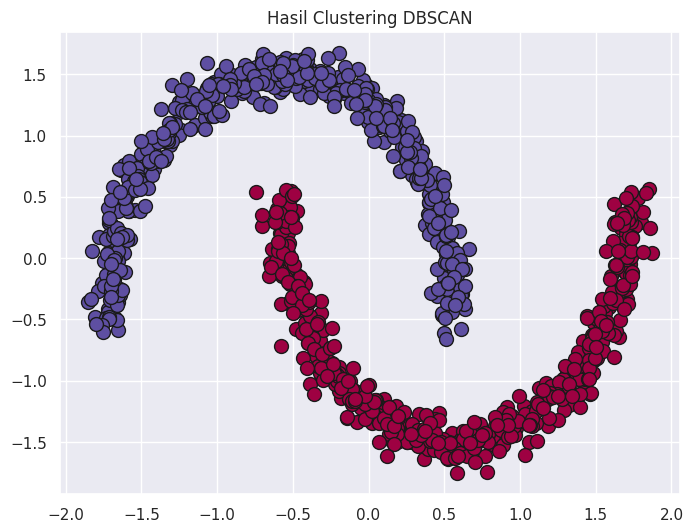

=== DBSCAN eps=0.05, min_samples=3 ===
Jumlah Klaster: 69
Jumlah Noise: 186
Homogeneity: 0.8155542882355717
Completeness: 0.15254831024758073
V-measure: 0.25702116445185835
ARI: 0.03004350976613907
AMI: 0.243804587789628
Silhouette: 0.11292949852882253
=== DBSCAN eps=0.05, min_samples=10 ===
Jumlah Klaster: 3
Jumlah Noise: 970
Homogeneity: 0.030669398254336424
Completeness: 0.126764095870306
V-measure: 0.04938947156339281
ARI: 0.0022825509789741014
AMI: 0.0458636142209481
Silhouette: -0.29419008256642176
=== DBSCAN eps=0.05, min_samples=20 ===
Jumlah Klaster: 0
Jumlah Noise: 1000
=== DBSCAN eps=0.1, min_samples=3 ===
Jumlah Klaster: 2
Jumlah Noise: 14
Homogeneity: 0.9862068060955204
Completeness: 0.9028959083596275
V-measure: 0.9427143195619004
ARI: 0.9721793882692121
AMI: 0.942633562340455
Silhouette: 0.2516903011504368
=== DBSCAN eps=0.1, min_samples=10 ===
Jumlah Klaster: 7
Jumlah Noise: 57
Homogeneity: 0.9433167874862703
Completeness: 0.4095463775841256
V-measure: 0.571132370522031

In [53]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

# 1. Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)  # normalisasi

# Fungsi untuk evaluasi clustering
def evaluate_dbscan(X, labels, y_true=None):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Jumlah Klaster: {n_clusters}")
    print(f"Jumlah Noise: {n_noise}")

    if n_clusters > 1:  # evaluasi hanya valid jika ada lebih dari 1 cluster
        print("Homogeneity:", homogeneity_score(y_true, labels))
        print("Completeness:", completeness_score(y_true, labels))
        print("V-measure:", v_measure_score(y_true, labels))
        print("ARI:", adjusted_rand_score(y_true, labels))
        print("AMI:", adjusted_mutual_info_score(y_true, labels))
        print("Silhouette:", silhouette_score(X, labels))
    print("="*50)

# Fungsi untuk visualisasi
def plot_dbscan(X, labels, core_samples_mask):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    plt.figure(figsize=(8,6))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Warna hitam untuk noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)

    plt.title("Hasil Clustering DBSCAN")
    plt.show()

# 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Evaluasi
evaluate_dbscan(X, labels, y_true=y)

# Visualisasi
plot_dbscan(X, labels, core_samples_mask)

# 5. Eksperimen dengan berbagai parameter
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for ms in min_samples_values:
        print(f"=== DBSCAN eps={eps}, min_samples={ms} ===")
        db = DBSCAN(eps=eps, min_samples=ms).fit(X)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True

        evaluate_dbscan(X, labels, y_true=y)


---

### Ringkasan Hasil Eksperimen DBSCAN

| eps  | min_samples | Jumlah Klaster | Noise | Homogeneity | Completeness | V-measure | ARI    | AMI    | Silhouette |
| ---- | ----------- | -------------- | ----- | ----------- | ------------ | --------- | ------ | ------ | ---------- |
| 0.05 | 3           | 69             | 186   | 0.8156      | 0.1525       | 0.2570    | 0.0300 | 0.2438 | 0.1129     |
| 0.05 | 10          | 3              | 970   | 0.0307      | 0.1268       | 0.0494    | 0.0023 | 0.0459 | -0.2942    |
| 0.05 | 20          | 0              | 1000  | -           | -            | -         | -      | -      | -          |
| 0.1  | 3           | 2              | 14    | 0.9862      | 0.9029       | 0.9427    | 0.9722 | 0.9426 | 0.2517     |
| 0.1  | 10          | 7              | 57    | 0.9433      | 0.4095       | 0.5711    | 0.5234 | 0.5698 | 0.1623     |
| 0.1  | 20          | 6              | 850   | 0.1539      | 0.1555       | 0.1547    | 0.0168 | 0.1509 | -0.3602    |
| 0.3  | 3           | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.3  | 10          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.3  | 20          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.5  | 3           | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.5  | 10          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |
| 0.5  | 20          | 2              | 0     | 1.0         | 1.0          | 1.0       | 1.0    | 1.0    | 0.3912     |

---

### Analisis

1. **Nilai eps terlalu kecil (0.05)**

   * Banyak titik dianggap **noise**, bahkan bisa sampai semua titik jadi noise (`min_samples=20`).
   * Klaster menjadi sangat banyak atau bahkan 0.
   * Kualitas evaluasi (Homogeneity, ARI, AMI) rendah.

2. **Nilai eps sedang (0.1)**

   * Jika `min_samples=3`, hasilnya cukup bagus: 2 klaster dengan sedikit noise (14).
   * Evaluasi tinggi (Homogeneity 0.98, ARI 0.97).
   * Jika `min_samples` dinaikkan, noise meningkat drastis dan kualitas turun.

3. **Nilai eps lebih besar (0.3 dan 0.5)**

   * DBSCAN berhasil menemukan **2 klaster utama** sesuai bentuk data moons.
   * Tidak ada noise.
   * Semua metrik evaluasi sempurna (1.0), Silhouette juga paling tinggi (0.39).

---

### Kesimpulan

* **DBSCAN sensitif terhadap parameter `eps` dan `min_samples`.**
* Untuk dataset **make_moons**, kombinasi **eps = 0.3 – 0.5** dengan berbagai `min_samples` menghasilkan **hasil terbaik**: 2 klaster sesuai ground truth, tanpa noise, evaluasi = 1.0.
* Jika `eps` terlalu kecil, titik sulit dikelompokkan → muncul banyak noise & klaster kecil-kecil (over-segmentation).

---
